# import the basic package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [48]:
train_ds = pd.read_csv("sentiment_train", delimiter="\t")
train_ds.head(5) # first five records of loaded dataset 

,sentiment,text
0,1,The Da Vinci Code book is just awesome.
1,1,"this was the first clive cussler i've ever read, but even books like Relic, and Da Vinci code were more plausible than this."
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly didn't seem to hold it's own.


In [3]:
# first 5 positive sentiments

pd.set_option('max_colwidth', 800)
train_ds[train_ds.sentiment==1][0:5]

,sentiment,text
0,1,The Da Vinci Code book is just awesome.
1,1,"this was the first clive cussler i've ever read, but even books like Relic, and Da Vinci code were more plausible than this."
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly didn't seem to hold it's own.


In [4]:
# first 5 negative sentiments
train_ds[train_ds.sentiment==0][0:5]

,sentiment,text
3943,0,da vinci code was a terrible movie.
3944,0,"Then again, the Da Vinci code is super shitty movie, and it made like 700 million."
3945,0,"The Da Vinci Code comes out tomorrow, which sucks."
3946,0,i thought the da vinci code movie was really boring.
3947,0,"God, Yahoo Games has this truly-awful looking Da Vinci Code-themed skin on it's chessboard right now."


In [49]:
# Exploring the dataset
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6918 entries, 0 to 6917
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  6918 non-null   int64 
 1   text       6918 non-null   object
dtypes: int64(1), object(1)
memory usage: 108.2+ KB


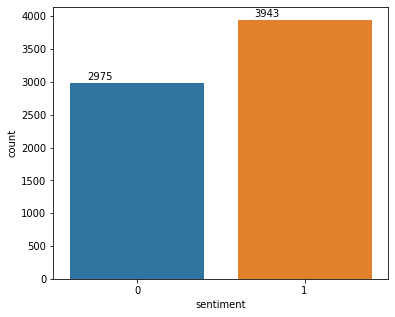

In [6]:
# visualization 

plt.figure(figsize=(6,5))
ax = sns.countplot(x ='sentiment', data=train_ds)
# annotate
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.1 ,
    p.get_height()+50))

# Text Preprocessing 

In [8]:
# creating count vectors for sentiment_train dataset

from sklearn.feature_extraction.text import CountVectorizer
# initialize the countvector

count_vectorizer = CountVectorizer()

# create the dictionary from the corpus

feature_vector = count_vectorizer.fit(train_ds.text)

# get the feature names

features = feature_vector.get_feature_names()

print("Total number of features:", len(features))

Total number of features: 2132


In [11]:
import random
random.sample(features, 100)

['comment',
 'oreos',
 'stites',
 'fit',
 '30',
 'seriously',
 'however',
 'tells',
 'evilpinkmunky',
 'banning',
 'culture',
 'basic',
 'who',
 'hello',
 'kenley',
 'jessica',
 'stupidest',
 'becuase',
 'avatar',
 'rare',
 'has',
 'staying',
 'came',
 'someone',
 'illustrated',
 'opinion',
 'open',
 'cobequid',
 'christmas',
 'life',
 'third',
 'answers',
 'pleased',
 'when',
 'frakking',
 'idiot',
 'positions',
 'anyway',
 'simmons',
 'hot',
 'place',
 'freaking',
 'she',
 'exquisite',
 'comparsions',
 'account',
 'tomorrow',
 'congrats',
 'coz',
 'office',
 'revise',
 'feeling',
 'fandom',
 'magical',
 'pop',
 'picard',
 'ban',
 'bobbypin',
 'majorly',
 'offensive',
 'matter',
 'deluded',
 'depp',
 'fell',
 'bachelor',
 'mcmurtry',
 'hell',
 'or',
 'explore',
 'wherever',
 'cold',
 'possible',
 'five',
 'burnt',
 'cussler',
 'race',
 'im',
 'experience',
 'eragon',
 'near',
 'ones',
 'rather',
 'wants',
 'sports',
 'pink',
 'south',
 'liberal',
 'sort',
 'loves',
 'boys',
 'get',
 '

In [12]:
train_ds_features = count_vectorizer.transform(train_ds.text)
type(train_ds_features)

scipy.sparse.csr.csr_matrix

In [13]:
train_ds_features.shape

(6918, 2132)

In [14]:
#getnnz() - how many total sparse metrix / count of zero

train_ds_features.getnnz()

65398

In [15]:
print('Density of the matrix:', train_ds_features.getnnz()* 100 /(train_ds_features.shape[0] * train_ds_features.shape[1]))

Density of the matrix: 0.4434010415225908


In [16]:
# dsplaying documents vector

# converting the matrix to a dataframe
train_ds_df = pd.DataFrame(train_ds_features.todense())

# setting the column names to the features i.e. words

train_ds_df.columns = features



In [18]:
train_ds_df.iloc[0:1,150:157]

,away,awesome,awesomely,awesomeness,awesomest,awful,awkward
0,0,1,0,0,0,0,0


Text(0, 0.5, 'Density')

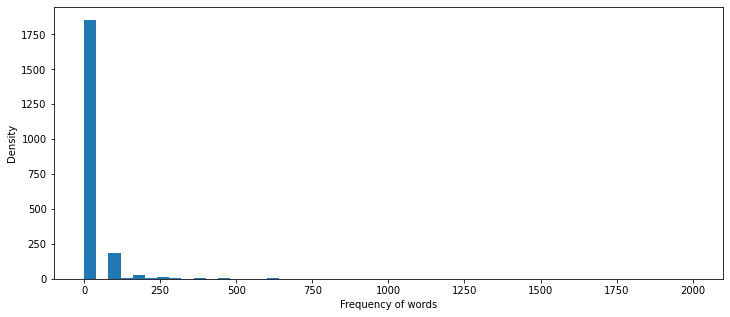

In [20]:
# removing the low frequency words

# summing up the occurances of features column wise

features_counts = np.sum(train_ds_features.toarray(), axis=0)
features_counts_df = pd.DataFrame(dict(features= features, counts = features_counts))

plt.figure(figsize=(12,5))
plt.hist(features_counts_df.counts, bins = 50, range = (0,2000))
plt.xlabel("Frequency of words")
plt.ylabel("Density")

In [21]:
print(len(features_counts_df[features_counts_df.counts==1]))
print("####"*20)
print(len(features_counts_df[features_counts_df.counts==0]))

1228
################################################################################
0


In [28]:
count_vectorizer = CountVectorizer(max_features=1000)
features_vector = count_vectorizer.fit(train_ds.text)
features = features_vector.get_feature_names()
train_ds_features = count_vectorizer.transform(train_ds.text)
features_counts = np.sum(train_ds_features.toarray(), axis=0)
feature_counts = pd.DataFrame(dict(features = features, counts = features_counts))
feature_counts.sort_values('counts', ascending = True)[0:50]

,features,counts
652,plausible,1
700,pudding,1
591,outnumbered,1
625,period,1
677,power,1
701,pull,1
588,others,1
702,pup,1
676,potterholic,1
703,purchase,1


In [29]:
count_vectorizer = CountVectorizer(max_features=1000)
features_vector = count_vectorizer.fit(train_ds.text)
features = features_vector.get_feature_names()
train_ds_features = count_vectorizer.transform(train_ds.text)
features_counts = np.sum(train_ds_features.toarray(), axis=0)
feature_counts = pd.DataFrame(dict(features = features, counts = features_counts))
feature_counts.sort_values('counts', ascending = False)[0:50]

,features,counts
866,the,3306
37,and,2154
358,harry,2093
675,potter,2093
138,code,2002
934,vinci,2001
178,da,2001
528,mountain,2000
104,brokeback,2000
488,love,1624


In [30]:
# Remove Stop words

from sklearn.feature_extraction import text

my_stop_words = text.ENGLISH_STOP_WORDS

print("Few Stop Words :", list(my_stop_words)[0:20])

Few Stop Words : ['sincere', 'will', 'every', 'eleven', 'please', 'bottom', 'thru', 'until', 'those', 'sometimes', 'to', 'too', 'whereas', 'ourselves', 'but', 'un', 'were', 'would', 'here', 'and']


In [31]:
my_stop_words

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [32]:
my_stop_words = text.ENGLISH_STOP_WORDS.union(['harry','potter','mountain'])

In [33]:
# creating count vecotrs
count_vectorizer = CountVectorizer(stop_words = my_stop_words, max_features=1000)
feature_vector = count_vectorizer.fit(train_ds.text)
train_ds_features = count_vectorizer.transform(train_ds.text)
features = feature_vector.get_feature_names()
features_counts = np.sum(train_ds_features.toarray(), axis=0)
feature_counts = pd.DataFrame(dict(features = features, counts = features_counts))
feature_counts.sort_values('counts', ascending = False)[0:50]

,features,counts
103,code,2002
141,da,2001
903,vinci,2001
72,brokeback,2000
409,love,1624
38,awesome,1127
437,mission,1094
342,impossible,1093
391,like,974
443,movie,783


In [35]:
from nltk.stem.snowball import PorterStemmer
stemmer = PorterStemmer()
analyzer = CountVectorizer().build_analyzer()

def stemmed_words(doc):
    stemmed_words = (stemmer.stem(w) for w in analyzer(doc))
    non_stop_words = [ word for word in list(set(stemmed_words) - set(my_stop_words))]
    return non_stop_words

In [36]:
count_vectorizer = CountVectorizer(analyzer = stemmed_words, max_features=1000)
feature_vector = count_vectorizer.fit(train_ds.text)
train_ds_features = count_vectorizer.transform(train_ds.text)
features = feature_vector.get_feature_names()
features_counts = np.sum(train_ds_features.toarray(), axis=0)
feature_counts = pd.DataFrame(dict(features = features, counts = features_counts))
feature_counts.sort_values('counts', ascending = False)[0:50]

,features,counts
108,code,1984
915,vinci,1982
144,da,1982
80,brokeback,1930
299,harri,1916
409,love,1837
801,suck,1378
922,wa,1142
43,awesom,1116
435,mission,1090


In [47]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6918 entries, 0 to 6917
Columns: 1000 entries, 10 to zen
dtypes: int64(1000)
memory usage: 52.8 MB


In [50]:
train_ds_df = pd.DataFrame(train_ds_features.todense())
train_ds_df.columns = features # independent variable
train_ds_df['sentiment'] = train_ds.sentiment # dependent variable

<AxesSubplot:xlabel='sentiment', ylabel='code'>

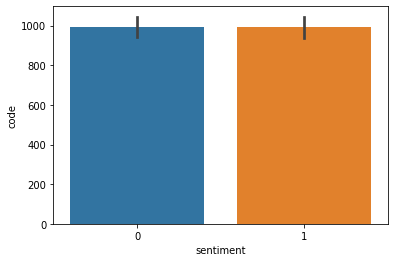

In [54]:
sns.barplot(x='sentiment', y='code', data=train_ds_df, estimator = sum)

In [55]:
train_ds_features

<6918x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 40658 stored elements in Compressed Sparse Row format>

In [56]:
train_ds.sentiment

0       1
1       1
2       1
3       1
4       1
       ..
6913    0
6914    0
6915    0
6916    0
6917    0
Name: sentiment, Length: 6918, dtype: int64

In [57]:
# Naive Bayes Model for sentiment Classification


# split the dataset into train and test

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(train_ds_features,train_ds.sentiment,train_size=0.75,
                                                   random_state=42)

In [58]:
print(train_x.shape)
print(test_x.shape)

print(train_y.shape)
print(test_y.shape)

(5188, 1000)
(1730, 1000)
(5188,)
(1730,)


In [60]:
# Model building - Naive Bayes Model
from sklearn.naive_bayes import BernoulliNB
nb_clf = BernoulliNB()
nb_clf.fit(train_x.toarray(), train_y)

BernoulliNB()

In [68]:
test_ds_predicted = nb_clf.predict(test_x.toarray())
train_ds_predicted = nb_clf.predict(train_x.toarray())

In [62]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [63]:
print(classification_report(test_y, test_ds_predicted))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       738
           1       0.98      0.99      0.98       992

    accuracy                           0.98      1730
   macro avg       0.98      0.98      0.98      1730
weighted avg       0.98      0.98      0.98      1730



In [64]:
print(confusion_matrix(test_y, test_ds_predicted))

[[715  23]
 [ 13 979]]


In [65]:
print(accuracy_score(test_y, test_ds_predicted))

0.9791907514450867


In [69]:
print(accuracy_score(train_y, train_ds_predicted))

0.9932536622976099


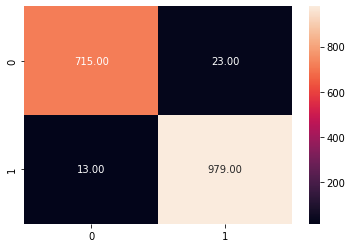

In [67]:
cm = confusion_matrix(test_y, test_ds_predicted)
sns.heatmap(cm, annot=True, fmt='.2f')
plt.show()